In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns
import json
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [3]:
db = sqlite3.connect('monitoring.db')
df = pd.read_sql_query('select task_label, task_elapsed_time from task where task_fail_count < 4', db)

In [4]:
df = df.dropna()

In [5]:
df['caller'] = df['task_label'].str[37:].str.strip()

In [6]:
df['patient'] = df['task_label'].str[:36].str.strip()

In [7]:
with open('sizes.json') as f:
    sizes = json.load(f)

In [8]:
df['size_KB'] = df['patient']
df['time_min'] = df['task_elapsed_time'] / 60.

In [9]:
for patient in sizes:
    df['size_KB'][df['patient'] == patient] = int(sizes[patient]['normal'] + sizes[patient]['tumor'])
    #df['size_KB'][df['patient'] == patient] = int(sizes[patient]['tumor'])

C:\Users\Gh0stGl1tch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df['size_GB'] = df['size_KB'] / 1e9

In [11]:
df.head()

,task_label,task_elapsed_time,caller,patient,size_KB,time_min,size_GB
0,0246823f-99f4-4a46-b2b1-27f81179584c-somaticsn...,2044.842830,somaticsniper,0246823f-99f4-4a46-b2b1-27f81179584c,38256217025,34.080714,38.2562
1,0246823f-99f4-4a46-b2b1-27f81179584c-muse,13864.270862,muse,0246823f-99f4-4a46-b2b1-27f81179584c,38256217025,231.071181,38.2562
3,05ce16d4-a999-491a-91ad-9449a57228ff-somaticsn...,1410.314701,somaticsniper,05ce16d4-a999-491a-91ad-9449a57228ff,26198662670,23.505245,26.1987
4,05ce16d4-a999-491a-91ad-9449a57228ff-muse,9316.071671,muse,05ce16d4-a999-491a-91ad-9449a57228ff,26198662670,155.267861,26.1987
6,117eb38b-0c62-4336-a866-fa5bd013256a-somaticsn...,3620.798409,somaticsniper,117eb38b-0c62-4336-a866-fa5bd013256a,55114172715,60.346640,55.1142


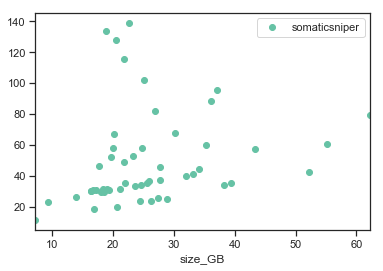

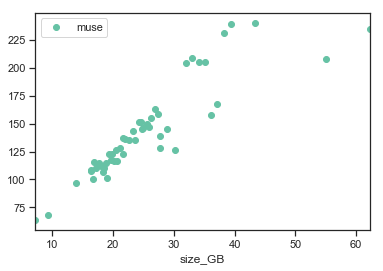

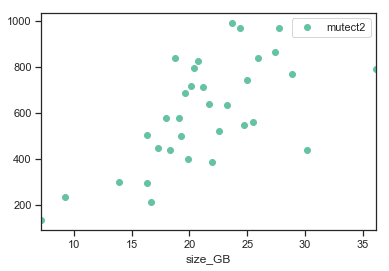

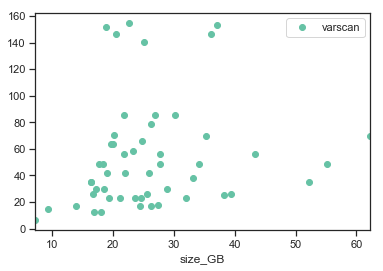

In [12]:
for caller in df.caller.unique():
    # print(df[df['caller'] == caller][['size_GB', 'time_min']])
    df[df['caller'] == caller].plot('size_GB', 'time_min', marker='o', linestyle='none', label=caller)

In [13]:
len(df[df['caller'] == 'muse'])

51

In [36]:
for caller in df.caller.unique():
    classic_kwargs = {'s': 20, 'edgecolors': 'k', 'c': 'b'}
    tempdf = df[df['caller']==caller]
    l = np.polyfit(np.array(tempdf['size_GB']).astype('float32'), np.array(tempdf['time_min']).astype('float32'), 1)
    print(l)
    x=np.linspace(min(tempdf['size_GB']), max(tempdf['size_GB']),100)
    a=plt.figure()
    plt.plot(x, (x*l[0]+l[1]),c='k')
    plt.title (caller)
    plt.xlabel ('size [GB]')
    plt.ylabel ('time [minutes]')
    plt.scatter(tempdf['size_GB'], tempdf['time_min'], c='k')
    a.savefig('variant'+caller+'.pdf', bbox_inches='tight', format = 'pdf')
    plt.clf()
    plt.show()

[ 0.59709659 34.37172798]


<Figure size 432x288 with 0 Axes>

[ 3.68667135 49.88193294]


<Figure size 432x288 with 0 Axes>

[26.0290123  48.77756772]


<Figure size 432x288 with 0 Axes>

[ 0.61099238 37.85508276]


<Figure size 432x288 with 0 Axes>